<h1>
<font color="#ff2e2e">
Color Space Conversion
</font>
</h1>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#change rgb to cymk 
def rgbtocmyk(r, g, b, RGB_SCALE, CMYK_SCALE):
    kp = 1 -(max(r, g , b)/(RGB_SCALE))
    c =((1-kp) - (r/RGB_SCALE))/ (1-kp)
    m =((1-kp) - (g/RGB_SCALE))/ (1-kp)
    y = ((1-kp) - (b/RGB_SCALE))/ (1-kp)
    return int(c * CMYK_SCALE), int(m * CMYK_SCALE), int(y * CMYK_SCALE),int(kp*CMYK_SCALE)

In [3]:
#change cymk to rgb
def cmyktorgb(c, m, y, k, CMYK_SCALE, RGB_SCALE ):
    scale = 1 - k/CMYK_SCALE
    r = int(RGB_SCALE * (1 - c/CMYK_SCALE) * scale)
    g = int(RGB_SCALE * (1 - m/CMYK_SCALE) * scale)
    b = int(RGB_SCALE * (1 - y/CMYK_SCALE) * scale)
    return r, g, b

In [4]:
c,y,m,k = rgbtocmyk(50,70, 130 ,255 ,100) 
print( "cymk : ", c,y,m,k)

print("rgb :",cmyktorgb(c,y,m,k , 100, 255))

cymk :  61 46 0 49
rgb : (50, 70, 130)


<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [5]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> BGR to YCbCr </font></h3>

In [6]:
def convert_to_ycbcr(image):
    '''
    Converts the color space of the input image to the YCbCr color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    result = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
    #############
    
    return result

<h3><font color = "#079e05"> BGR to HSV </font></h3>

In [7]:
def convert_to_hsv(image):
    '''
    Converts the color space of the input image to the HSV color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    result = cv2.cvtColor(image , cv2.COLOR_RGB2HSV)
    #############
        
    return result

<h3><font color = "#079e05"> Show the result </font></h3>

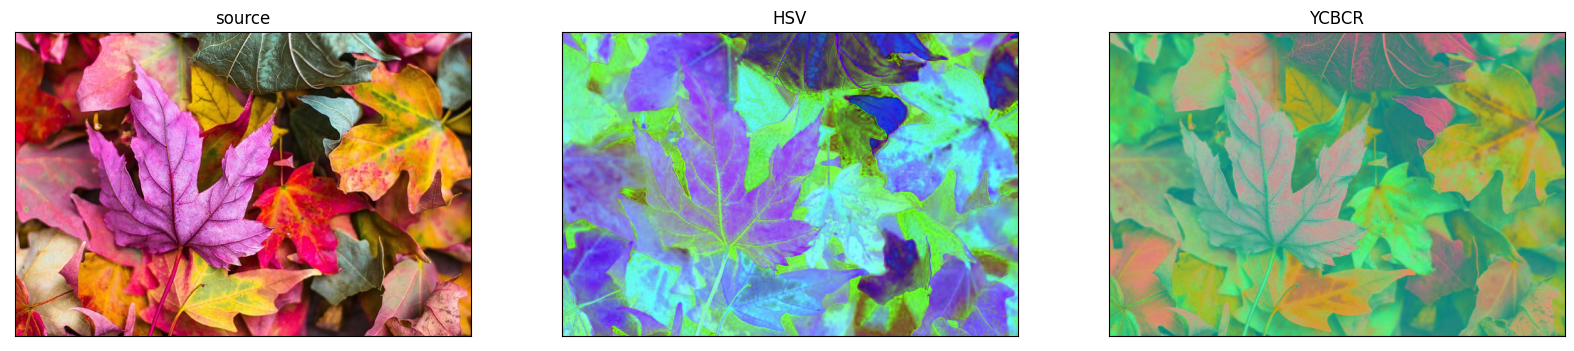

In [8]:
image_list = []
image = cv2.imread(os.path.join('images/Q1', '1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([convert_to_hsv(image), 'HSV', 'img'])
image_list.append([convert_to_ycbcr(image), 'YCBCR', 'img'])
plotter(image_list,1 , 3, True, 20, 10, '2A')

# part C

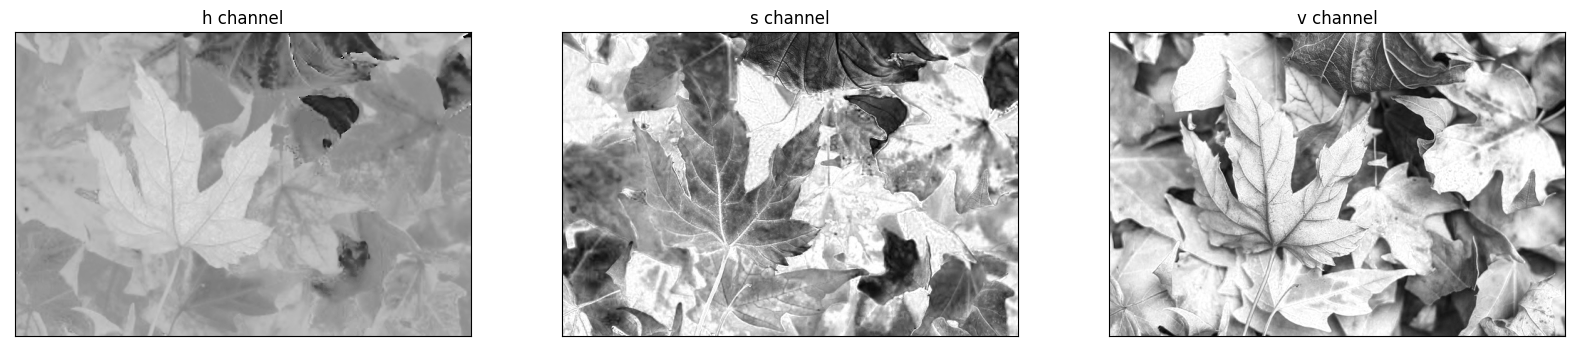

In [9]:
hsv = convert_to_hsv(image)
h, s, v = hsv[:,:,0] , hsv[:,:,1] , hsv[:,:,2]
channels = [[h, 'h channel' , 'img'] , [s ,  's channel' , 'img'] , [v , 'v channel' , 'img']]
plotter(channels,1 , 3, True, 20, 10, '2A')

<h1>
<font color="#ff2e2e">
Finding Differences
</font>
</h1>

In [10]:
def dif(image1, image2):
  
    # h,v = image1.shape
    # blank_image = np.zeros((h-1,v,3), np.uint8)
    # print(h , v)
    # blank_image[:, : , 0]  = image1[1: , :]
    # blank_image[:, : , 1]  = image2[: , 1:]
    # blank_image[:, : , 2]  = image2[: , 1:]
  
    h,v = image1.shape
    blank_image = np.zeros((h-1,v,3), np.uint8)
    print(h , v)
    blank_image[:, : , 0]  = image1[1: , :]
    blank_image[:, : , 1]  = image2[: , 1:]
    blank_image[:, : , 2]  = image2[: , 1:]

  
    #############
    # Your code #
    #############
    
    return blank_image

917 921


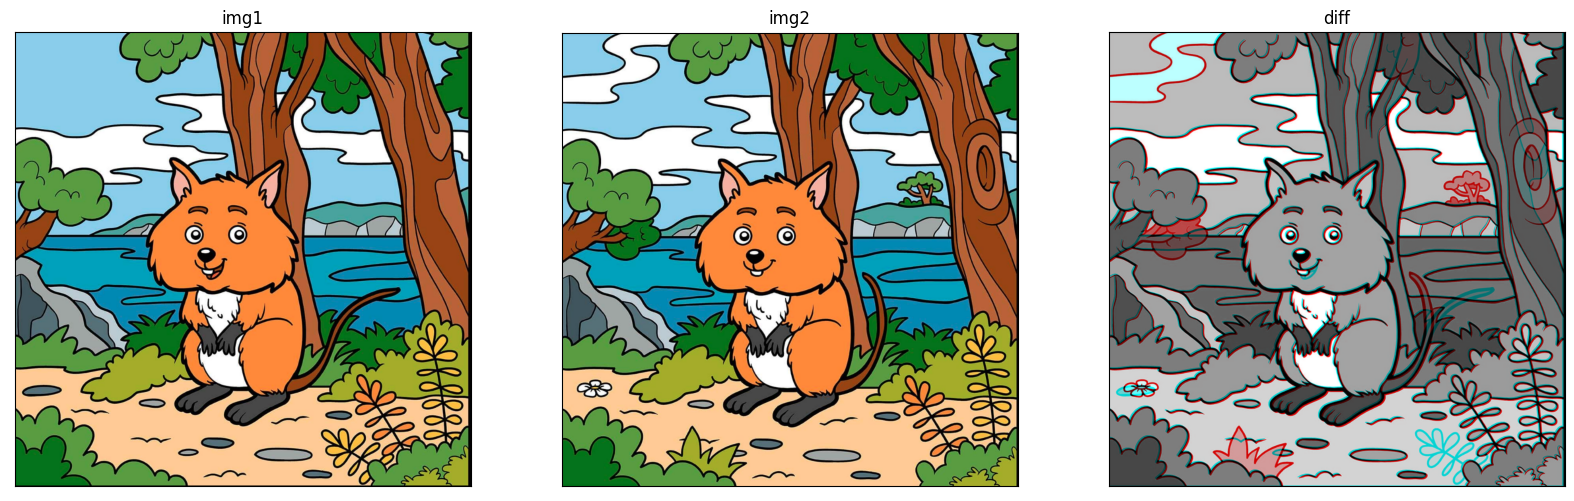

In [11]:
image_list = []

image1 = cv2.imread(os.path.join('images/Q1', '2.png'))
image_list.append([cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), 'img1', 'img'])
image2 = cv2.imread(os.path.join('images/Q1', '3.png'))
image_list.append([cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), 'img2', 'img'])


image1 = cv2.imread(os.path.join('images/Q1', '2.png'), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join('images/Q1', '3.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([dif(image1, image2), 'diff', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2B')